# Unit 7 - Section 2: Visualization with Python

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import warnings
warnings.filterwarnings('ignore')

# Outline

__[2.1] Plotting with Matplotlib__

__[2.2] Introduction to simulating__

__[2.3] Visualizing the Mandelbrot Set__

__References__

Import necessary packages

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.ticker as ticker

# [2.1] Plotting with Matplotlib

### Set parameters to style the plots

In [3]:
plt.style.use('ggplot')
plt.rcParams['lines.linewidth']=3
plt.rcParams['axes.facecolor']='1.0'
plt.rcParams['xtick.color']='black'
plt.rcParams['axes.grid']=True
plt.rcParams['axes.edgecolor']='black'
plt.rcParams['grid.color']= '0.7'
plt.rcParams.update({'font.size': 14}) 

### Create phony data

In [4]:
#define variable containing list
x = range(0 , 101 , 1) #a list containing the numbers 1 - 100, spaced by 1

#when manipulating lists of numbers in Python, it's helpful to conver these lists into Numpy arrays
x = np.array(x)

This is what our toy data looks like

In [5]:
x

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100])

### Create plots of data

First let's just create a scatter plot of the list of number against itself, this corresponds to the function below:

### $f(x) = x$

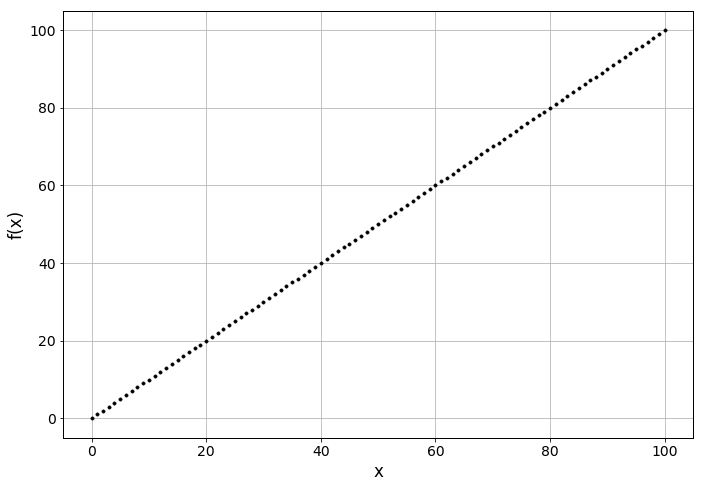

In [6]:
#create the instance of the figure
fig, ax = plt.subplots()

#plot each point in x mapping to itself
plt.scatter(x , x , s = 11 , c = '0.0') #1st element is the coordinates for the x-axis, 2nd element is the coordinates for the y-axis

#lets label our axes
ax.set_ylabel('f(x)' , color = 'k')
ax.set_xlabel('x' , color = 'k')

#set the color of our axes ticks to black
ax.tick_params(axis='y', colors='k')
ax.tick_params(axis='x', colors='k')

#we specify how big we want our figure to be
fig = plt.gcf()
fig.set_size_inches(10, 7.0)
fig.tight_layout()

plt.show()

We can also add a line connecting the points by plotting a lineplot on top of the scatter plot

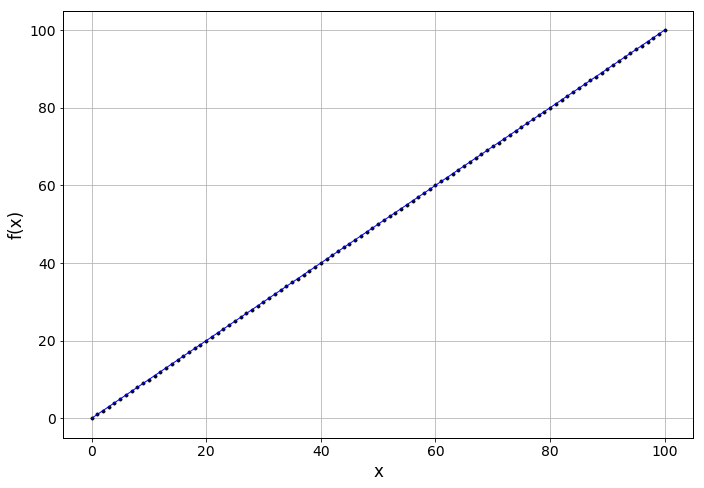

In [7]:
fig, ax = plt.subplots()
plt.scatter(x , x , s = 11 , c = '0.0')

#add lineplot
plt.plot(x , x , c = 'blue' , linewidth = 1.0)

ax.set_ylabel('f(x)' , color = 'k')
ax.set_xlabel('x' , color = 'k')

ax.tick_params(axis='y', colors='k')
ax.tick_params(axis='x', colors='k')

fig = plt.gcf()
fig.set_size_inches(10, 7.0)
fig.tight_layout()

plt.show()

Or just plot the line on its own!

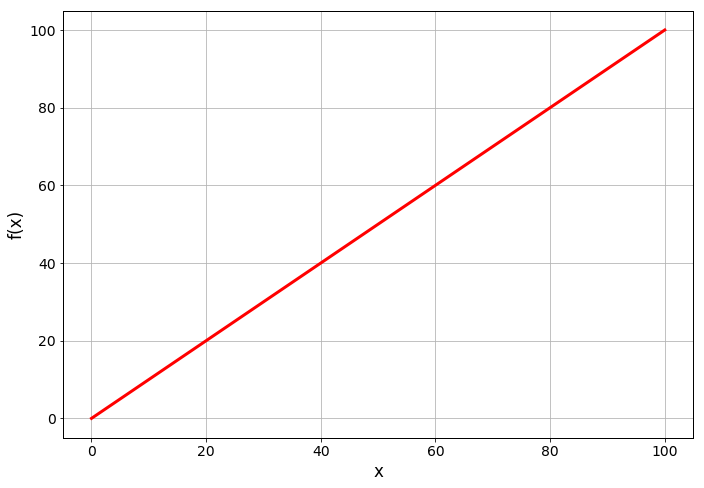

In [8]:
fig, ax = plt.subplots()

plt.plot(x , x , c = 'red' , linewidth = 3.0) #note that we changed the color & width of the line

ax.set_ylabel('f(x)' , color = 'k')
ax.set_xlabel('x' , color = 'k')

ax.tick_params(axis='y', colors='k')
ax.tick_params(axis='x', colors='k')

fig = plt.gcf()
fig.set_size_inches(10, 7.0)
fig.tight_layout()

plt.show()

### Let's try plotting some other functions

Instead of plotting each point against itself, we'll plot each point in our original list of numbers x against the square of itself:

### $f(x) = x^2$

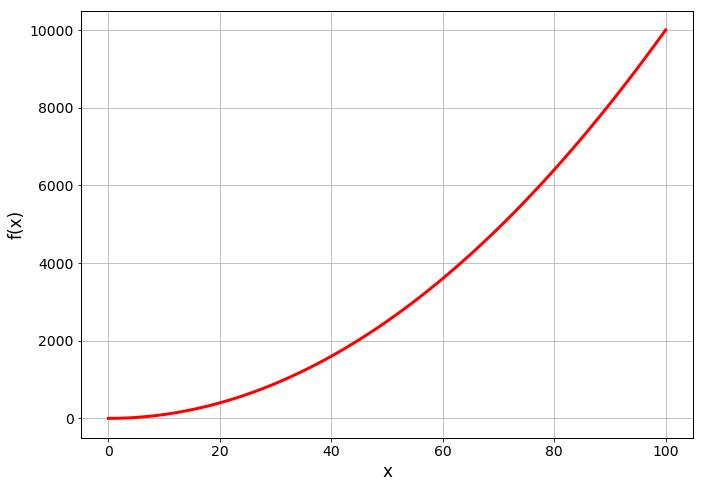

In [9]:
fig, ax = plt.subplots()

plt.plot(x , x**2 , c = 'red' , linewidth = 3.0) #'x**2' squares every element in x

ax.set_ylabel('f(x)' , color = 'k')
ax.set_xlabel('x' , color = 'k')

ax.tick_params(axis='y', colors='k')
ax.tick_params(axis='x', colors='k')

fig = plt.gcf()
fig.set_size_inches(10, 7.0)
fig.tight_layout()

plt.show()

Let's try each element in x against the square root of itself 

### $f(x) = \sqrt{x}$

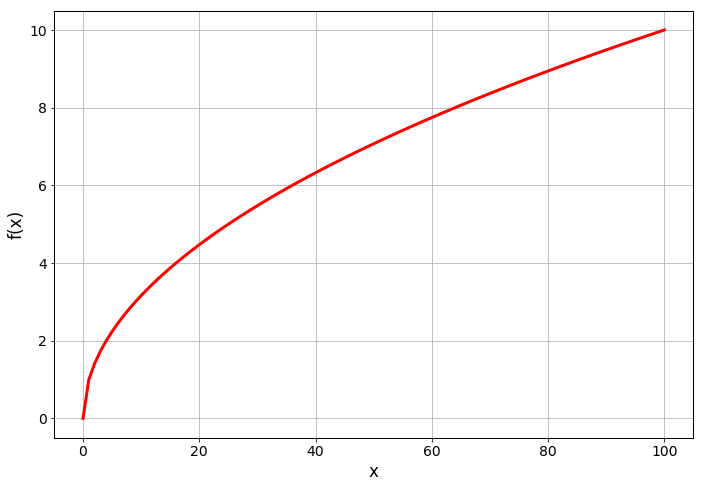

In [10]:
fig, ax = plt.subplots()

plt.plot(x , x**(1.0/2.0) , c = 'red' , linewidth = 3.0)

ax.set_ylabel('f(x)' , color = 'k')
ax.set_xlabel('x' , color = 'k')

ax.tick_params(axis='y', colors='k')
ax.tick_params(axis='x', colors='k')

fig = plt.gcf()
fig.set_size_inches(10, 7.0)
fig.tight_layout()

plt.show()

Each element and the corresponding element cubed

### $f(x) = x^3$

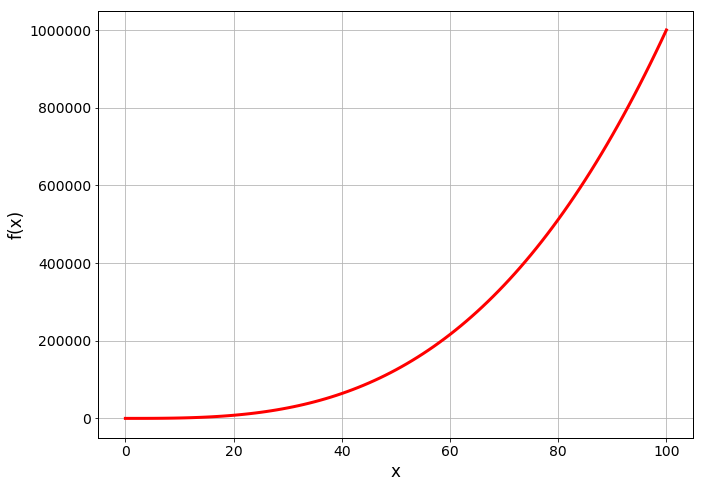

In [11]:
fig, ax = plt.subplots()

plt.plot(x , x**3 , c = 'red' , linewidth = 3.0)

ax.set_ylabel('f(x)' , color = 'k')
ax.set_xlabel('x' , color = 'k')

ax.tick_params(axis='y', colors='k')
ax.tick_params(axis='x', colors='k')

fig = plt.gcf()
fig.set_size_inches(10, 7.0)
fig.tight_layout()

plt.show()

The x-axis of all of our plots has been 0-100, why? Because our INPUT list has always been the elements [0,1,2,...,99,100].

What happens when we change that input list?

In [12]:
#define variable containing list
x = range(-100 , 101 , 1) #a list containing the numbers -100 - 100, spaced by 1
x = np.array(x)

This is what x looks like now

In [13]:
x

array([-100,  -99,  -98,  -97,  -96,  -95,  -94,  -93,  -92,  -91,  -90,
        -89,  -88,  -87,  -86,  -85,  -84,  -83,  -82,  -81,  -80,  -79,
        -78,  -77,  -76,  -75,  -74,  -73,  -72,  -71,  -70,  -69,  -68,
        -67,  -66,  -65,  -64,  -63,  -62,  -61,  -60,  -59,  -58,  -57,
        -56,  -55,  -54,  -53,  -52,  -51,  -50,  -49,  -48,  -47,  -46,
        -45,  -44,  -43,  -42,  -41,  -40,  -39,  -38,  -37,  -36,  -35,
        -34,  -33,  -32,  -31,  -30,  -29,  -28,  -27,  -26,  -25,  -24,
        -23,  -22,  -21,  -20,  -19,  -18,  -17,  -16,  -15,  -14,  -13,
        -12,  -11,  -10,   -9,   -8,   -7,   -6,   -5,   -4,   -3,   -2,
         -1,    0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
         10,   11,   12,   13,   14,   15,   16,   17,   18,   19,   20,
         21,   22,   23,   24,   25,   26,   27,   28,   29,   30,   31,
         32,   33,   34,   35,   36,   37,   38,   39,   40,   41,   42,
         43,   44,   45,   46,   47,   48,   49,   

And now we can plot the relationship $f(x) = x^3$ again with our updated list!

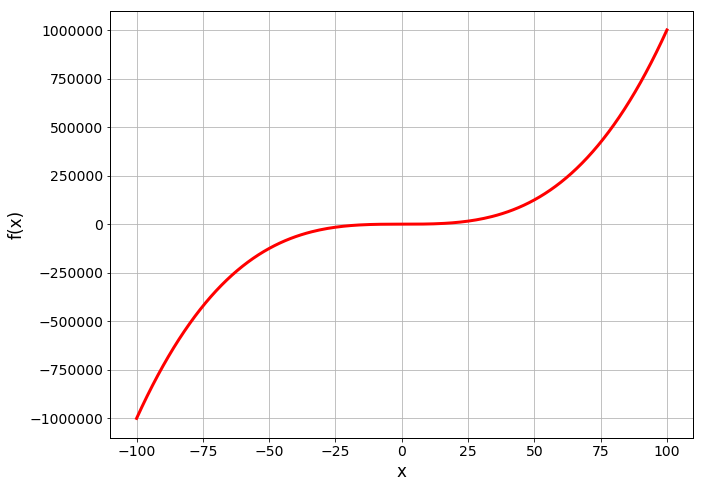

In [14]:
fig, ax = plt.subplots()

plt.plot(x , x**3 , c = 'red' , linewidth = 3.0)

ax.set_ylabel('f(x)' , color = 'k')
ax.set_xlabel('x' , color = 'k')

ax.tick_params(axis='y', colors='k')
ax.tick_params(axis='x', colors='k')

fig = plt.gcf()
fig.set_size_inches(10, 7.0)
fig.tight_layout()

plt.show()

The possibilities are endless...

# [2.2] Introduction to simulating

### Background

Suppose that you're in a room full of $n$ people and each person has a quarter. Assuming that you have an unbiased coin, what is the probability that a flipped coin will land heads?

You'd probably say that the coin has a 50% chance of landing heads but now suppose that you want to test this with the room full of people. All $n$ people in the room can flip their coins and we can tally up how many coin flips were heads and how many times coins flipped tails. You can then divide the number of times the coin flips heads by the __Number of Flips__ ($n$) to get an estimate of how likely the coin will land heads on any given flip (we'll denote this $\hat{p}$).

$$\textbf{Proportion of Flips that land Heads} = \hat{p} = \frac{\text{Number of Heads}}{\text{Number of Flips}} = \frac{\text{Number of Heads}}{n}$$

How many people would you need to obtain an accurate estimate of this probability?


Suppose $n = 1$: If you're the only person in the room and you flip the coin, it'll either land heads or tails and if you count the number of times the coin lands heads and divide by the number of times you flipped the coin, you'll either get $\frac{1}{1} = 1$ (if the coin landed heads) or $\frac{0}{1} = 0$ (if the coin landed tails). This isn't super informative.

Suppose $n = 2$: If you and a buddy are in the room and you both flip coins, then there are 4 possibilities (H = heads , T = tails)

$$HH \quad:\quad HT \quad:\quad TH \quad:\quad TT$$

which have the corresponding $\hat{p}$ 

$$\frac{2}{2} = 1 \quad:\quad \frac{1}{2} = 0.5 \quad:\quad \frac{1}{2} = 0.5 \quad:\quad \frac{0}{2} = 0$$

You might get the right answer (0.5) or you might get 1 or 0 again. 

$n = ?$

So how many people ($n$) need to be in the room in order to ensure a good estimate $\hat{p}$ close to the true value of $p = 0.5$? This is the question we set out to answer using this simulation based approach.

##### Binomial Distribution

I won't go into too many details here but the basic idea is that for some chosen number of people $n$ flipping the coin with a $50\%$ chance of landing heads, the number of resulting heads follows a specific pattern known as a **Binomial Distribution**. This pattern is characterized by two parameters, the probability that the coin lands heads $p$ and the number of people flipping a coin $n$. 

We say the **number of times the coin lands heads** (denote this $X$) follows a Binomial Distribution with $n$ trials and probability of success $p$ or $$X \sim Bin(n , p)$$

So we're trying to figure out the number of people we need to flip a coin in order to get an accurate estimate of the coin landing heads. **Numpy** has several functions where you can *draw* a random number from some specified distribution. So here's the game plan:

1. For some number of people $n$, we'll draw from $Bin(n , 0.5)$ to get the number of times that the coin landed heads.
1. We'll divide the number of times the coin lands heads by $n$ to get an estimate for $p$;  ($\hat{p}$)
1. First we'll do this for just one person ($n = 1$), then 2 people ($n = 2$) and so on for the scenario in which there are $n = 1600$ people flipping coins.
1. Python makes it easy to repeat steps (1) and (2) $1600$ times.

Recall that the goal is to see how many people we need to have flipping the coin at once in order to get a pretty good estimate for the probability of a coin landed heads ($\hat{p} \approx p$)

### Loops

Loops are a way of repeating a set of instructions in Python. Here we'll use what's called a **for loop**. We're going to repeat the process outlined above for $n \in \{1, 2, 3, \dots, 1600 \}$. This is when the **simulation** comes into play, specifically when we draw from the random distribution every time we go through the loop.

In [15]:
p = 0.5 #probability of coin landing heads (p)
number_of_coin_flips_list = np.array( range(1 , 1601 , 1) ) #number of coin-flips for each case (n)

In [16]:
proportion_heads_list = []

#we're going to iterate over different values of n
for n in number_of_coin_flips_list:
    
    #we'll draw from a Binomial distribution with n trials & probability of success 
    number_of_heads = np.random.binomial(n, p)
    
    #divide the number of heads by the number trials
    proportion_of_flips_heads = float(number_of_heads) / float(n)
    
    #store this in the list with the propotion of trials that flipped heads for varying trial numbers
    proportion_heads_list.append(proportion_of_flips_heads)
    
#convert to array
proportion_heads_list = np.array(proportion_heads_list)

### Plotting Redux

Now that we have the results of our simulation, we can visualize our estimates for $\hat{p}$, the Proportion of Flips that land Heads for varying values of $n$. We have our vector that holds the different values of $n$ (the number of flips for each *loop*) and our vector of estimates. So let's plot them against eachother!

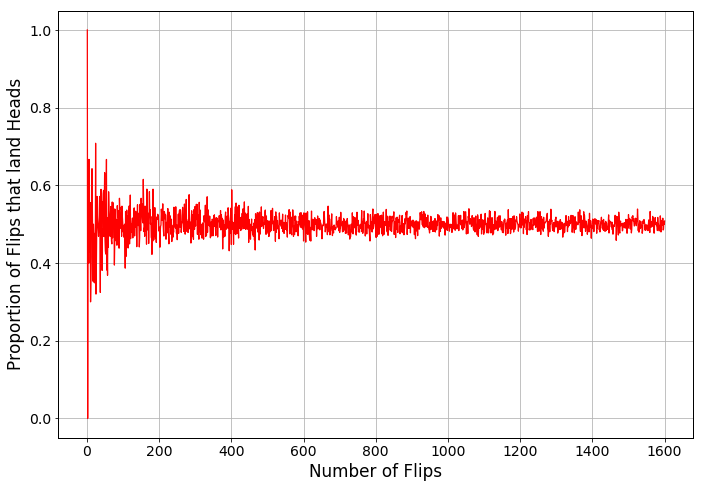

In [17]:
fig, ax = plt.subplots()

plt.plot(number_of_coin_flips_list , proportion_heads_list , c = 'red' , linewidth = 1.25)

ax.set_ylabel('Proportion of Flips that land Heads' , color = 'k')
ax.set_xlabel('Number of Flips' , color = 'k')

ax.tick_params(axis='y', colors='k')
ax.tick_params(axis='x', colors='k')

fig = plt.gcf()
fig.set_size_inches(10, 7.0)
fig.tight_layout()

plt.show()

The plot confirms what we thought would happen intuitively. You get some crazy estimates for $\hat{p}$ when the number of flips is low (there are only a couple of people flipping the coin) but once you have enough people flipping the coin, the estimates get get a lot closer to $50\%$ which of course is the correct answer. 

So how many people do you need in the room flipping the coin? It's your call but I'd say once you have a few hundred people ($n = 500$) your estimate becomes really close to the true underlying probability of the coin landing heads on any given flip.

# [2.3] Visualizing the Mandelbrot Set

### Background

We're now going to use Python to visualize a beautiful mathematical structure known as the *Mandelbrot Set* that will end up displaying a fractal. The point of this is to get a chance to see what other really cool things you can do in Python, *you do not have to understand the math behind this*. 

- It's totally okay if you're not as comfortable with complex numbers, you can watch this [video](https://www.youtube.com/watch?v=FFftmWSzgmk) which does an fantastic job explaining what we're going to visualize. Once you watch this video you'll probably be able to see why creating this visualization in Python is actually a pretty straight-forward task.

Once you've watched the video and know a bit about the Mandelbrot Set, let's create the fractal!

### Parameters

We want to create a square composed of a mesh by mesh grid, the higher the value of mesh, the clearer the resolution will be but this also equates to a longer run time. 

- We create a grid of points, for each point we will track an orbit over 100 iterations and keep track of whether the sequence corresponding to each point *diverges* and how quickly it diverges or *stays bounded*.

In [18]:
mesh = 1000

ymin and xmax must should have the same absolute value for best results code builds a square with the parameters given below, on which the mandelbrot set is displayed

In [19]:
ymin = float(-2)
xmax = float(2)

Number of terms of sequence you want to compute for a given values of C the higher the number the better of an approximation you will get for the mandelbrot set (finder detail), also equals higher run time

In [20]:
iterations = 100

### Algorithm

This list will store the 'mesh' other lists, notice that we're using a lot of *for loops* here!

In [21]:
big_list = [None]*mesh

In [22]:
for i in range(1, mesh+1):
    small_list = [None]*mesh
    for j in range(1, mesh + 1):
        #we test parameters 'c' in the upper half rectangle of the  2x2 square
        c1 = ymin + (ymin**2) * (i / float(mesh))
        c2 = xmax - (xmax**2) * (j / float(mesh))
        x = float(c1)
        y = float(c2)
        #now we iterate the orbit 'iteration' times to see if the sequence diverges
        for k in range(1, iterations+1):
            
            #we can break any given complex number that's squared into its 
            #real and imaginary parts as follows:
            x1 = x**2 - y**2 + c1
            y1 = 2*x*y + c2
            r = x1**2 + y1**2
            
            #if r > 4, then sequence evetually diverges, if r < 4, 
            #then we iterate again to see if sequence stays bounded
            if r > 4:
                small_list[j-1] = k
                break
            x = x1
            y = y1
            
            #if after iterating 100 times the sequence is still bounded, then 
            #we let this point take on a value of zero
            if r < 4 and k == iterations:
                small_list[j-1] = iterations + 1
    big_list[i-1] = small_list

### Figure

Package data neatly for plotting into a numpy array

In [23]:
data = np.array(big_list)
data = np.transpose(data)

In [24]:
data

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

We create the figure using Matplotlib by creating a heatmap of the numpy array above.

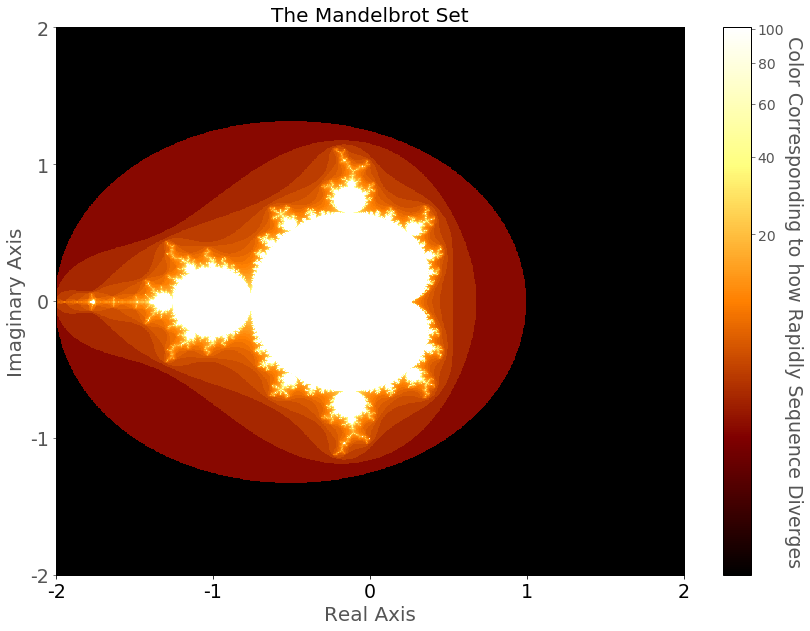

In [25]:
fig, ax = plt.subplots()

norm = mpl.colors.PowerNorm(gamma=1.0/3.5)
heatmap = ax.pcolor(data, cmap=plt.cm.afmhot , norm = norm)

#Legend
cbar = plt.colorbar(heatmap)
cbar.ax.get_yaxis().labelpad = 19
cbar.ax.set_ylabel('Color Corresponding to how Rapidly Sequence Diverges', rotation=270 , fontsize = 19)

#Plot Labels
plt.xlabel('Real Axis',fontsize = 20)
plt.ylabel('Imaginary Axis',fontsize = 20)
plt.title('The Mandelbrot Set',fontsize = 20)

#Put the major ticks at the middle of each cell & label accordingly
#set ticks
ax.set_xticks(np.arange(0,mesh+mesh/4,mesh/4), minor=False)
ax.set_yticks(np.arange(0,mesh+mesh/4,mesh/4), minor=False)

#define labels
column_labels = ['-2', '-1', '0', '1', '2']
row_labels = ['-2', '-1', '0', '1', '2']

#set labels at ticks
ax.set_xticklabels(row_labels, minor=False,)
ax.set_yticklabels(column_labels, minor=False)

#make tick-labels bigger by setting to larger font
plt.tick_params(axis='both', which='major', labelsize=19)
plt.tick_params(axis='both', which='minor', labelsize=19)

#Display Visulization of the Mandelbrot Set
fig = plt.gcf()
fig.set_size_inches(12.0, 9.0)
fig.tight_layout()

plt.show()

# References

**Binomial Distribution**

- [https://en.wikipedia.org/wiki/Binomial_distribution](https://en.wikipedia.org/wiki/Binomial_distribution)

**Visualizing the Mandelbrot Set**

- Robert L Devaney, Luke Devaney, and Luke Devaney. An introduction to chaotic dynamical systems, volume 13046. Addison-Wesley Reading, 1989.

- Robert L Devaney, Gary Welz, and Livingston Hinckley. Chaos, fractals and dynamics: computer experiments in mathematics. American Mathematical Society, 1989.

- Benoit B Mandelbrot. The fractal geometry of nature. Macmillan, 1983.

- Benoit B Mandelbrot. Fractals and chaos, volume 3. Springer Science & Business Media, 2004.

- [https://www.youtube.com/watch?v=FFftmWSzgmk](https://www.youtube.com/watch?v=FFftmWSzgmk)